In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import Data

In [113]:
data = pd.read_csv("/Users/pedro/github/intro-statistical-learning/data/titanic/train.csv")


In [114]:
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Use PassengerId column as index

In [121]:
data = pd.read_csv("/Users/pedro/github/intro-statistical-learning/data/titanic/train.csv", index_col = 'PassengerId')

#save np array just in case
datanp = np.array(data)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's look at some graphs to try and spot patterns

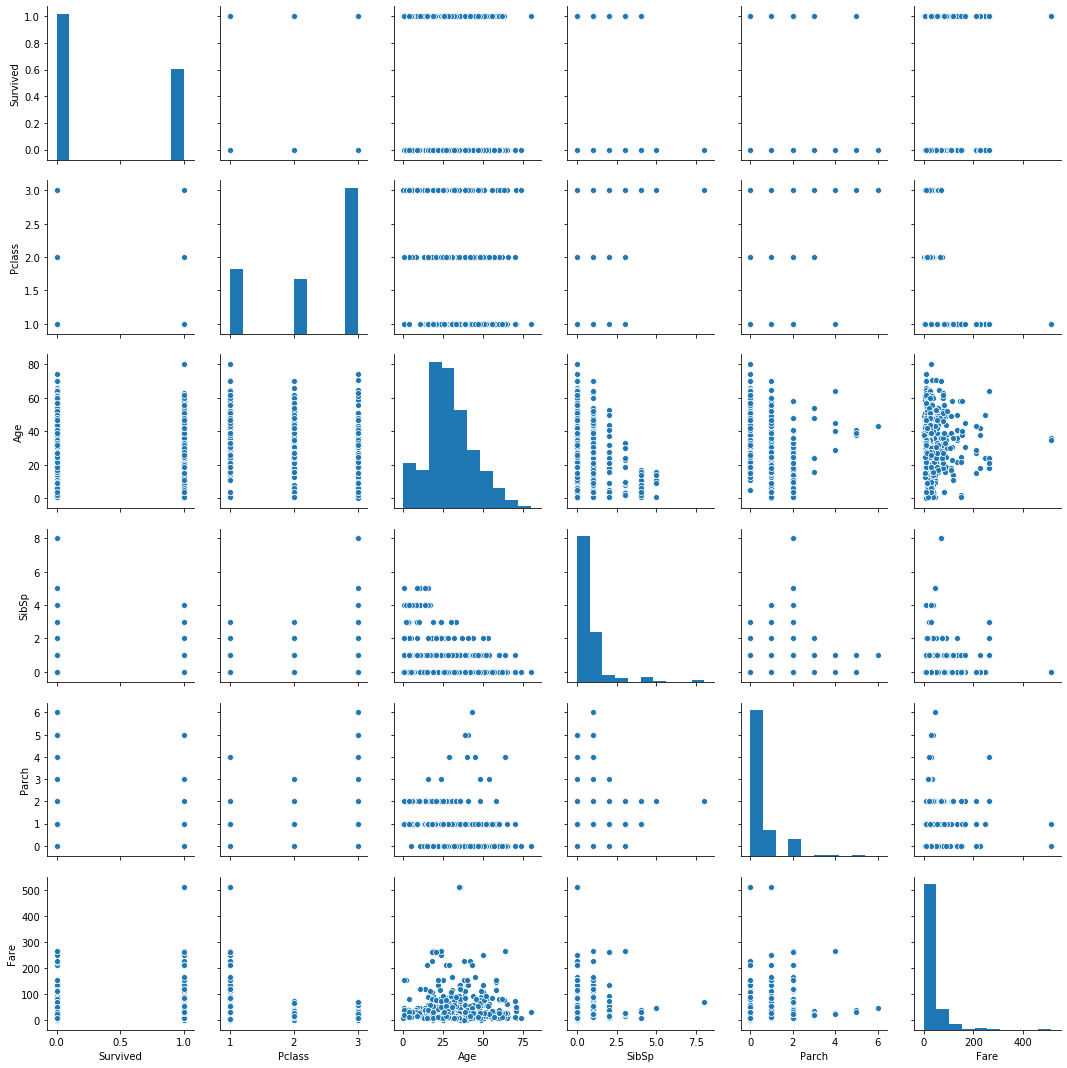

In [15]:
sns.pairplot(data)

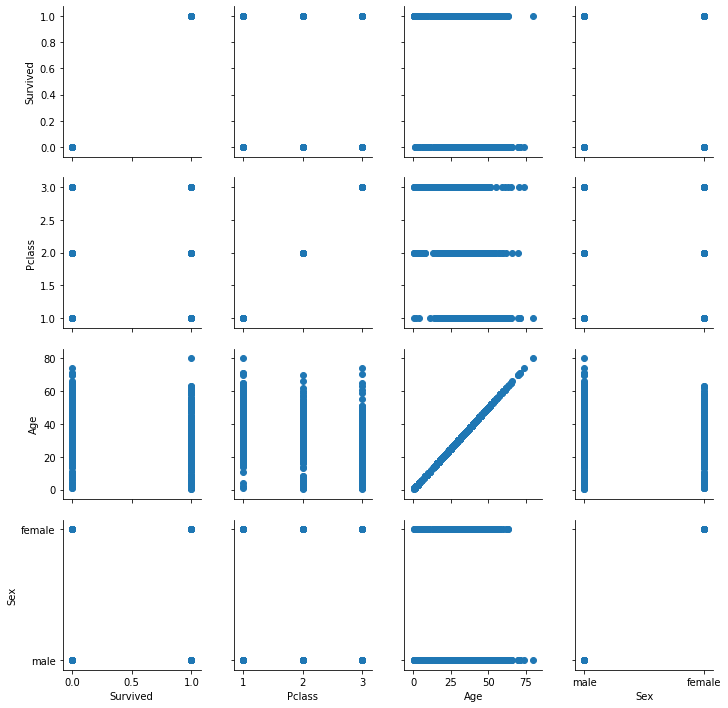

In [32]:
g = sns.PairGrid(data, vars = ['Survived', 'Pclass', 'Age', 'Sex'])
g.map(plt.scatter)

#I couldn't plot embarked because of some nans i think

# More plots

In [34]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
#data.Embarked.value_counts()
#was just trying this out

<BarContainer object of 2 artists>

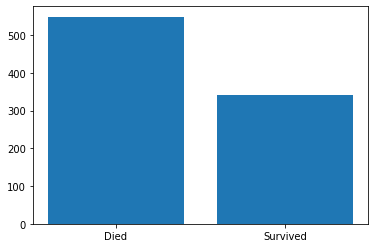

In [37]:
plt.bar(['Died', 'Survived'], data.Survived.value_counts())

In [45]:
men_survived = (data.loc[:,'Sex'] == 'male') & (data.loc[:,'Survived'] == 1)
men_died = (data.loc[:,'Sex'] == 'male') & (data.loc[:,'Survived'] == 0)

Text(0.5, 1.0, 'Men Survival Count')

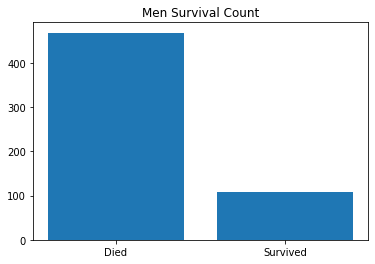

In [66]:
plt.bar(['Died', 'Survived'], [men_died.sum(), men_survived.sum()])
plt.title('Men Survival Count')


Text(0.5, 1.0, 'Women Survival Count')

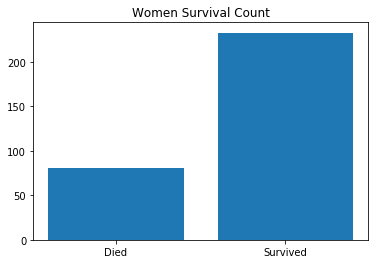

In [67]:
women_survived = (data.loc[:,'Sex'] == 'female') & (data.loc[:,'Survived'] == 1)
women_died = (data.loc[:,'Sex'] == 'female') & (data.loc[:,'Survived'] == 0)

plt.bar(['Died', 'Survived'], [women_died.sum(), women_survived.sum()])
plt.title('Women Survival Count')

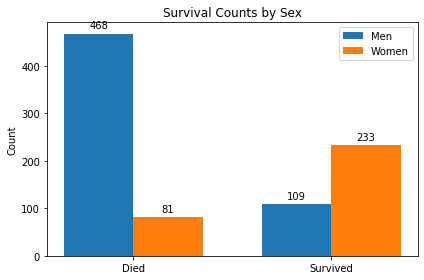

In [70]:
labels = ['Died', 'Survived']
men_counts = [men_died.sum(), men_survived.sum()]
women_counts = [women_died.sum(), women_survived.sum()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_counts, width, label='Men')
rects2 = ax.bar(x + width/2, women_counts, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [158]:
n_men = (data.loc[:,'Sex'] == 'male').sum()
n_women = (data.loc[:,'Sex'] == 'female').sum()
#P(D|Men)
P_died_men = men_died.sum()/n_males

#P(D|Women)
P_died_women = women_died.sum()/n_women


Lets plot those probabilites

Text(0.5, 1.0, 'Probability of dying given Sex')

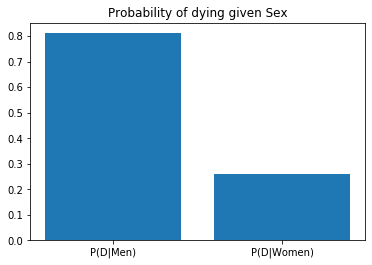

In [160]:
plt.bar(['P(D|Men)', 'P(D|Women)'], [P_died_men, P_died_women])
plt.title('Probability of dying given Sex')

# Visualising distributions

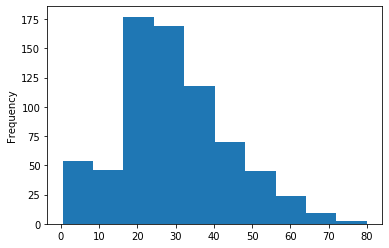

In [90]:
data.Age.plot.hist()

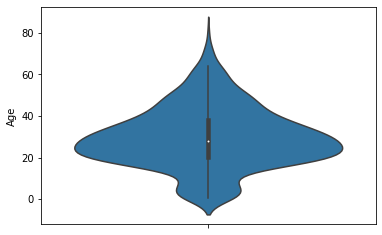

In [102]:
sns.violinplot(y=data.Age)

In [137]:
died = data.Survived == 0
survived = data.Survived == 1

data_died = np.array(data[died])
data_survived = np.array(data[survived])

print('Died\n', data[died].Age.describe(), '\n\nSurvived\n', data[survived].Age.describe())

Died
 count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64 

Survived
 count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


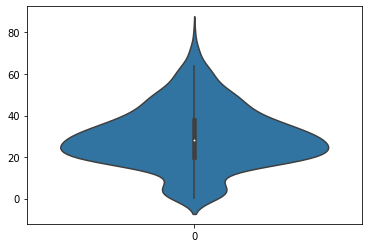

In [117]:
sns.violinplot(data=datanp[:,4])

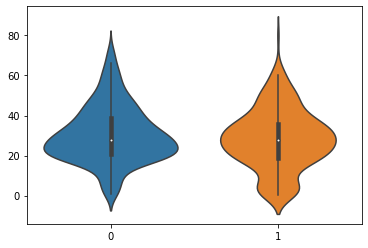

In [139]:
sns.violinplot(data=[data_died[:,4], data_survived[:,4]])

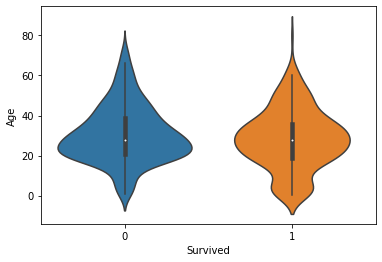

In [227]:
sns.violinplot(x=data['Survived'], y=data['Age'])

A closer look at the children

In [213]:
children = data[data.Age < 18]
children.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.539823,2.584071,9.041327,1.460177,1.053097,31.220798
std,0.500632,0.677781,6.030408,1.625881,0.800008,32.538092
min,0.000000,1.000000,0.420000,0.000000,0.000000,7.054200
25%,0.000000,2.000000,3.000000,0.000000,0.000000,12.287500
50%,1.000000,3.000000,9.000000,1.000000,1.000000,23.000000
75%,1.000000,3.000000,16.000000,3.000000,2.000000,34.375000
max,1.000000,3.000000,17.000000,5.000000,3.000000,211.337500


In [221]:
children_died = children.Survived == 1
children_survived = children.Survived == 0

61

<BarContainer object of 2 artists>

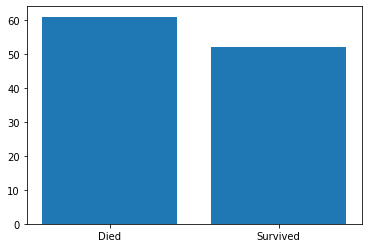

In [222]:
plt.bar(['Died', 'Survived'],[children_died.sum(), children_survived.sum()])

# Class

In [140]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


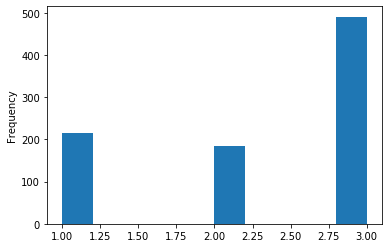

In [141]:
data.Pclass.plot.hist()

Now let's split them up by survival like we did for men and women

In [147]:
first_died = (data.loc[:,'Pclass'] == 1) & (data.loc[:,'Survived'] == 0)
second_died = (data.loc[:,'Pclass'] == 2) & (data.loc[:,'Survived'] == 0)
third_died = (data.loc[:,'Pclass'] == 3) & (data.loc[:,'Survived'] == 0)

first_survived = (data.loc[:,'Pclass'] == 1) & (data.loc[:,'Survived'] == 1)
second_survived = (data.loc[:,'Pclass'] == 2) & (data.loc[:,'Survived'] == 1)
third_survived = (data.loc[:,'Pclass'] == 3) & (data.loc[:,'Survived'] == 1)

print(third_died.sum(), third_survived.sum())

372 119


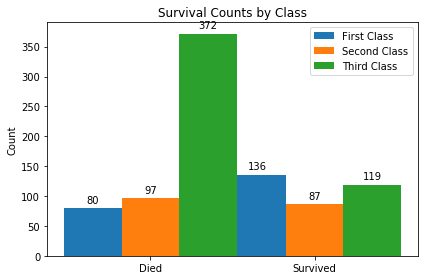

In [157]:
labels = ['Died', 'Survived']
first_counts = [first_died.sum(), first_survived.sum()]
second_counts = [second_died.sum(), second_survived.sum()]
third_counts = [third_died.sum(), third_survived.sum()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, first_counts, width, label='First Class')
rects2 = ax.bar(x + 0, second_counts, width, label='Second Class')
rects3 = ax.bar(x + width, third_counts, width, label='Third Class')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

Now, lets plot that in bayesian probabilities

0.37037037037037035 0.5271739130434783 0.7576374745417516


Text(0.5, 1.0, 'Probability of dying given Proxy Class')

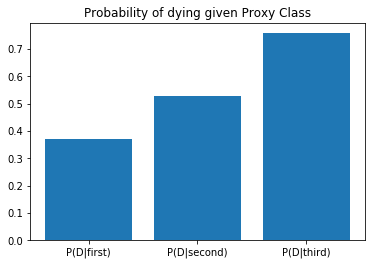

In [173]:
n_first = (data.loc[:,'Pclass'] == 1).sum()
n_second = (data.loc[:,'Pclass'] == 2).sum()
n_third = (data.loc[:,'Pclass'] == 3).sum()

#P(D|first)
P_died_first = first_died.sum()/n_first
P_died_second = second_died.sum()/n_second
P_died_third = third_died.sum()/n_third

print(P_died_first, P_died_second, P_died_third)

plt.bar(['P(D|first)', 'P(D|second)', 'P(D|third)'],[P_died_first, P_died_second, P_died_third])
plt.title('Probability of dying given Proxy Class')


# Siblings or Spouses

Does seem to have a different distribution

In [174]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
data.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

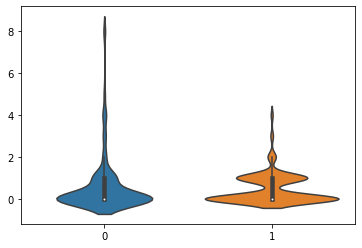

In [177]:
sns.violinplot(data=[data_died[:,5], data_survived[:,5]])

# Parents/Children

Doesn't seem to have different distributions but still may be informative

In [188]:
data.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

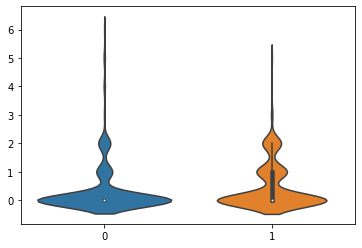

In [189]:
sns.violinplot(data=[data_died[:,6], data_survived[:,6]])

In [195]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [207]:
data[survived].Parch.value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [204]:
data[died].Parch.value_counts()

0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64

# Fare

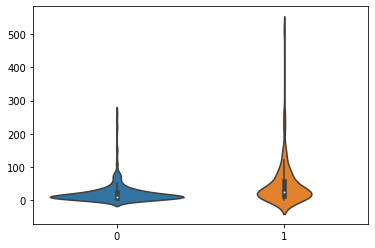

In [224]:
sns.violinplot(data=[data_died[:,8], data_survived[:,8]])

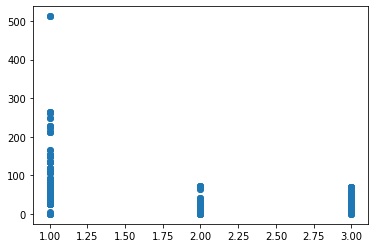

In [225]:
plt.scatter(data.Pclass, data.Fare)

PassengerId
1      3
2      1
3      3
4      1
5      3
      ..
887    2
888    1
889    3
890    1
891    3
Name: Pclass, Length: 891, dtype: int64